## Common Libraries

In [1]:
import matplotlib.pyplot as plt
import matplotlib
params = {'axes.titlesize':'14',
          'xtick.labelsize':'14',
          'ytick.labelsize':'14',
          'font.size':'14',
          'legend.fontsize':'medium',
          'lines.linewidth':'2',
          'font.weight':'normal',
          'lines.markersize':'10'
          }
matplotlib.rcParams.update(params)
plt.rcParams["mathtext.fontset"] = "cm"
plt.rc('font', family='serif')

import time
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

## Importing Pure Frequency Oracles from multi_freq_ldpy

In [2]:
from multi_freq_ldpy.pure_frequency_oracles.GRR import *
from multi_freq_ldpy.pure_frequency_oracles.UE import *
from multi_freq_ldpy.pure_frequency_oracles.ADP import *
from multi_freq_ldpy.pure_frequency_oracles.LH import *

## Reading Adult dataset with only 'age' attribute

In [3]:
df = pd.read_csv('datasets/db_adults.csv', usecols=['age'])
df

,age
0,39
1,50
2,38
3,53
4,28
...,...
45217,33
45218,39
45219,38
45220,44


## Encoding values

In [4]:
LE = LabelEncoder()

df['age'] = LE.fit_transform(df['age'])
df

,age
0,22
1,33
2,21
3,36
4,11
...,...
45217,16
45218,22
45219,21
45220,27


## Static Parameteres

In [5]:
# number of users (n)
n = df.shape[0]
print('Number of Users =',n)

# attribute's domain size
k = len(set(df['age']))
print("\nAttribute's domain size =", k)

print("\nPrivacy guarantees:")

# range of epsilon
lst_eps = np.arange(0.5, 5.1, 0.5)
print('Epsilon values =', lst_eps)

Number of Users = 45222

Attribute's domain size = 74

Privacy guarantees:
Epsilon values = [0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]


## Comparison of frequency oracles

In [6]:
# Real normalized frequency
real_freq = np.unique(df, return_counts=True)[-1] / n

# Repeat nb_seed times since DP protocols are randomized
nb_seed = 50

# Save Mean Squared Error (MSE) between real and estimated frequencies per seed
dic_mse = {seed: 
               {"GRR": [],
               "SUE": [],
               "OUE": [],
               "BLH": [],
               "OLH": [],
               } 
               for seed in range(nb_seed)
          }

starttime = time.time()
for seed in range(nb_seed):
    print('Starting w/ seed:', seed)

    for eps in lst_eps:
        
        # GRR protocol
        grr_reports = [GRR_Client(input_data, k, eps) for input_data in df['age']]
        grr_est_freq = GRR_Aggregator(grr_reports, k, eps)
        dic_mse[seed]["GRR"].append(mean_squared_error(real_freq, grr_est_freq))

        # SUE protocol
        sue_reports = [UE_Client(input_data, k, eps, optimal=False) for input_data in df['age']]
        sue_est_freq = UE_Aggregator(sue_reports, eps, optimal=False)
        dic_mse[seed]["SUE"].append(mean_squared_error(real_freq, sue_est_freq))

        # OUE protocol
        oue_reports = [UE_Client(input_data, k, eps, optimal=True) for input_data in df['age']]
        oue_est_freq = UE_Aggregator(oue_reports, eps, optimal=True)
        dic_mse[seed]["OUE"].append(mean_squared_error(real_freq, oue_est_freq))

        # BLH protocol        
        blh_reports = [LH_Client(input_data, eps, optimal=False) for input_data in df['age']]
        blh_est_freq = LH_Aggregator(blh_reports, k, eps, optimal=False)
        dic_mse[seed]["BLH"].append(mean_squared_error(real_freq, blh_est_freq))

        # OLH protocol       
        olh_reports = [LH_Client(input_data, eps, optimal=True) for input_data in df['age']]
        olh_est_freq = LH_Aggregator(olh_reports, k, eps, optimal=True)
        dic_mse[seed]["OLH"].append(mean_squared_error(real_freq, olh_est_freq))
print('That took {} seconds'.format(time.time() - starttime))        

Starting w/ seed: 0
Starting w/ seed: 1
Starting w/ seed: 2
Starting w/ seed: 3
Starting w/ seed: 4
Starting w/ seed: 5
Starting w/ seed: 6
Starting w/ seed: 7
Starting w/ seed: 8
Starting w/ seed: 9
Starting w/ seed: 10
Starting w/ seed: 11
Starting w/ seed: 12
Starting w/ seed: 13
Starting w/ seed: 14
Starting w/ seed: 15
Starting w/ seed: 16
Starting w/ seed: 17
Starting w/ seed: 18
Starting w/ seed: 19
Starting w/ seed: 20
Starting w/ seed: 21
Starting w/ seed: 22
Starting w/ seed: 23
Starting w/ seed: 24
Starting w/ seed: 25
Starting w/ seed: 26
Starting w/ seed: 27
Starting w/ seed: 28
Starting w/ seed: 29
Starting w/ seed: 30
Starting w/ seed: 31
Starting w/ seed: 32
Starting w/ seed: 33
Starting w/ seed: 34
Starting w/ seed: 35
Starting w/ seed: 36
Starting w/ seed: 37
Starting w/ seed: 38
Starting w/ seed: 39
Starting w/ seed: 40
Starting w/ seed: 41
Starting w/ seed: 42
Starting w/ seed: 43
Starting w/ seed: 44
Starting w/ seed: 45
Starting w/ seed: 46
Starting w/ seed: 47
St

## Plotting metrics results

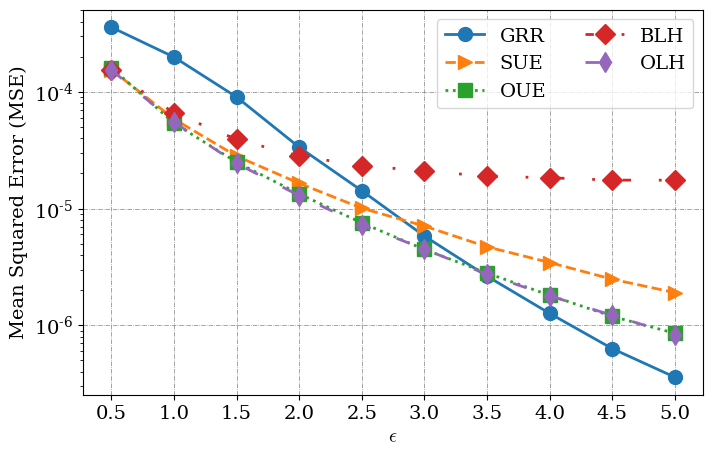

In [7]:
plt.figure(figsize=(8,5))
plt.grid(color='grey', linestyle='dashdot', linewidth=0.5)
plt.plot(np.mean([dic_mse[seed]["GRR"] for seed in range(nb_seed)], axis=0), label='GRR', marker='o')
plt.plot(np.mean([dic_mse[seed]["SUE"] for seed in range(nb_seed)], axis=0), label='SUE',marker='>',linestyle='dashed')
plt.plot(np.mean([dic_mse[seed]["OUE"] for seed in range(nb_seed)], axis=0), label='OUE',marker='s',linestyle='dotted')
plt.plot(np.mean([dic_mse[seed]["BLH"] for seed in range(nb_seed)], axis=0), label='BLH', marker='D', linestyle=(0, (3, 10, 1, 10)))
plt.plot(np.mean([dic_mse[seed]["OLH"] for seed in range(nb_seed)], axis=0), label='OLH',marker='d',linestyle=(0, (5, 10)))

plt.yscale('log')
plt.xlabel('$\epsilon$')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(range(len(lst_eps)), lst_eps)
plt.legend(ncol=2)
plt.show()

## Example of Real vs Estimated Freqencies

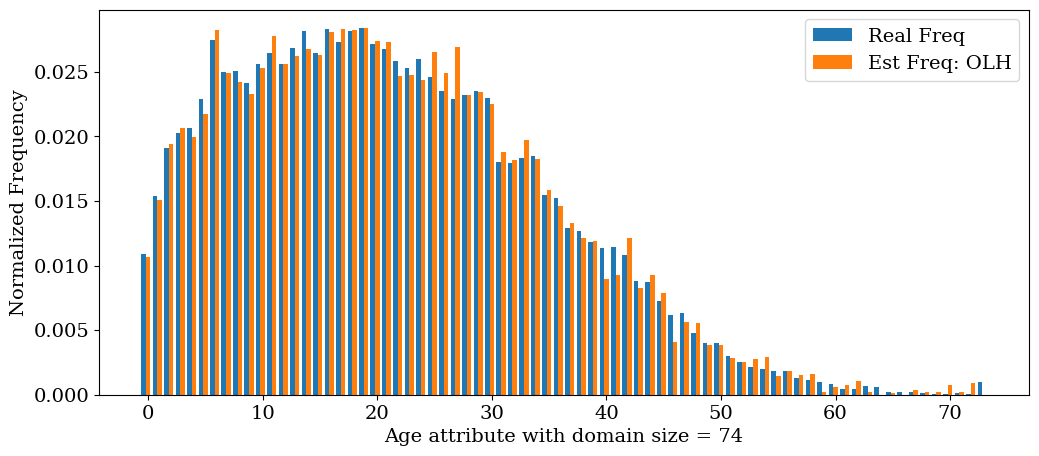

In [8]:
plt.figure(figsize=(12, 5))

barwidth = 0.4
x_axis = np.arange(k)

plt.bar(x_axis - barwidth, real_freq, label='Real Freq', width=barwidth)
plt.bar(x_axis, olh_est_freq, label='Est Freq: OLH', width=barwidth)
plt.ylabel('Normalized Frequency')
plt.xlabel('Age attribute with domain size = {}'.format(k))
plt.legend()
plt.show();